In [2]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc90/BHOSS_CODE"
data = "Rh160_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_337.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9263.615142 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 4.89548e-48 0.00149025
Total flux = 2.053213 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.973143 Rg/c, inclination: 70.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 8.89303e-16 0.00136536
Total flux = 2.116031 Jy at 230 GHz
135:26:46.287 - Start Program


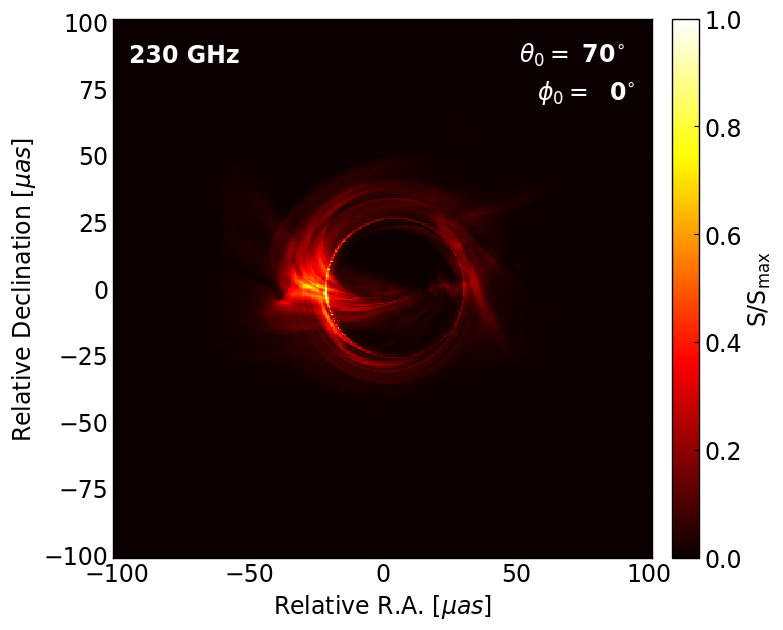

In [13]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [3]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [20]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 10, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc10/BHOSS_CODE
311, flux: 2.424020 at 9003.597816
312, flux: 2.378528 at 9013.664967
313, flux: 2.384411 at 9023.730951
314, flux: 2.399538 at 9033.794470
315, flux: 2.448702 at 9043.862656
316, flux: 2.405123 at 9053.929463
317, flux: 2.318530 at 9063.995875
318, flux: 2.258431 at 9074.060236
319, flux: 2.239825 at 9084.125014
320, flux: 2.235281 at 9094.191161
321, flux: 2.275160 at 9104.258463
322, flux: 2.255811 at 9114.324296
323, flux: 2.224088 at 9124.388087
324, flux: 2.177633 at 9134.450798
325, flux: 2.162781 at 9144.515488
326, flux: 2.169089 at 9154.580838
327, flux: 2.276072 at 9164.643343
328, flux: 2.341859 at 9174.708090
329, flux: 2.357203 at 9184.774596
330, flux: 2.355249 at 9194.841238
331, flux: 2.350206 at 9204.906551
332, flux: 2.306318 at 9214.968879
333, flux: 2.197291 at 9225.032659
334, flux: 2.148505 at 9235.096933
335, flux: 2.112018 at 9243.486122
336, flux: 2.027020 at 9253.551623
337,

In [21]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [22]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.985249 Jy, the density scale = 3.510000e-18


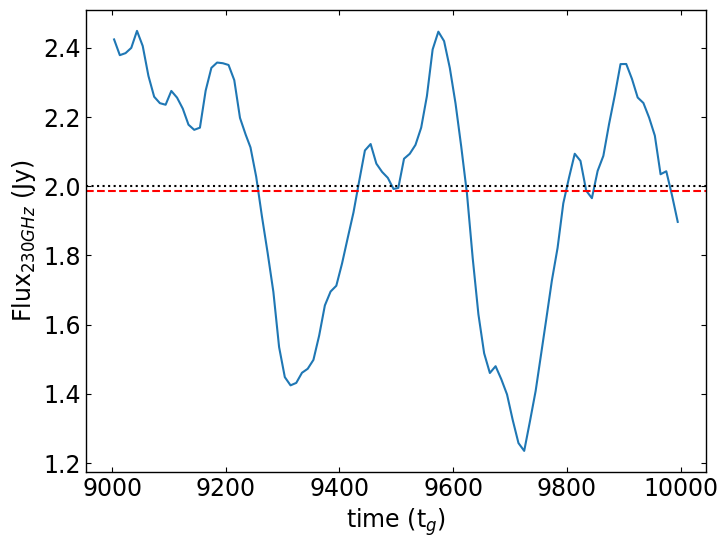

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [24]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.424020 Jy at 9003.597816
312:: 2.378528 Jy at 9013.664967
313:: 2.384411 Jy at 9023.730951
314:: 2.399538 Jy at 9033.794470
315:: 2.448702 Jy at 9043.862656
316:: 2.405123 Jy at 9053.929463
317:: 2.318530 Jy at 9063.995875
318:: 2.258431 Jy at 9074.060236
319:: 2.239825 Jy at 9084.125014
320:: 2.235281 Jy at 9094.191161
321:: 2.275160 Jy at 9104.258463
322:: 2.255811 Jy at 9114.324296
323:: 2.224088 Jy at 9124.388087
324:: 2.177633 Jy at 9134.450798
325:: 2.162781 Jy at 9144.515488
326:: 2.169089 Jy at 9154.580838
327:: 2.276072 Jy at 9164.643343
328:: 2.341859 Jy at 9174.708090
329:: 2.357203 Jy at 9184.774596
330:: 2.355249 Jy at 9194.841238
331:: 2.350206 Jy at 9204.906551
332:: 2.306318 Jy at 9214.968879
333:: 2.197291 Jy at 9225.032659
334:: 2.148505 Jy at 9235.096933
335:: 2.112018 Jy at 9243.486122
336:: 2.027020 Jy at 9253.551623
337:: 1.912715 Jy at 9263.615142
338:: 1.806981 Jy at 9273.678488
339:: 1.694567 Jy at 9283.741347
340:: 1.535029 Jy at 9293.805262
341:: 1.44

In [25]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 30, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc30/BHOSS_CODE
311, flux: 2.301113 at 9003.597816
312, flux: 2.236878 at 9013.664967
313, flux: 2.222800 at 9023.730951
314, flux: 2.227734 at 9033.794470
315, flux: 2.231848 at 9043.862656
316, flux: 2.139609 at 9053.929463
317, flux: 2.031485 at 9063.995875
318, flux: 1.980006 at 9074.060236
319, flux: 1.954148 at 9084.125014
320, flux: 1.973402 at 9094.191161
321, flux: 2.024627 at 9104.258463
322, flux: 2.013880 at 9114.324296
323, flux: 2.020369 at 9124.388087
324, flux: 2.009026 at 9134.450798
325, flux: 2.007359 at 9144.515488
326, flux: 2.027984 at 9154.580838
327, flux: 2.156638 at 9164.643343
328, flux: 2.238884 at 9174.708090
329, flux: 2.270757 at 9184.774596
330, flux: 2.282154 at 9194.841238
331, flux: 2.295526 at 9204.906551
332, flux: 2.259201 at 9214.968879
333, flux: 2.164873 at 9225.032659
334, flux: 2.151265 at 9235.096933
335, flux: 2.140649 at 9243.486122
336, flux: 2.069511 at 9253.551623
337,

In [26]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [27]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.936759 Jy, the density scale = 3.370000e-18


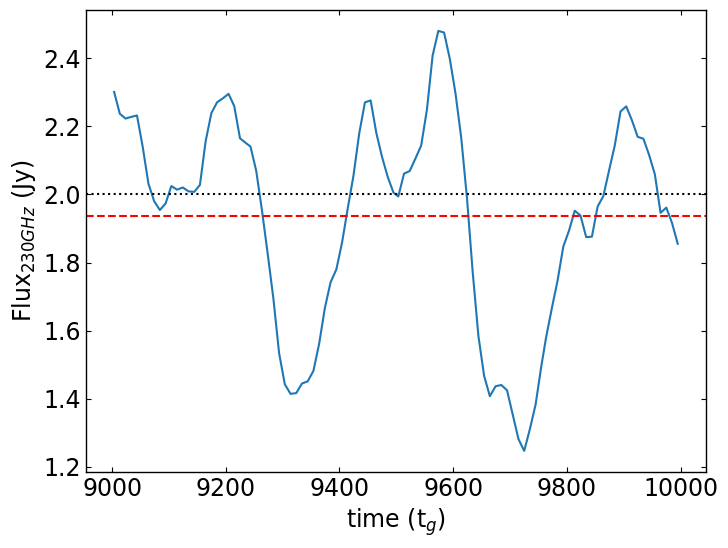

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [29]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.301113 Jy at 9003.597816
312:: 2.236878 Jy at 9013.664967
313:: 2.222800 Jy at 9023.730951
314:: 2.227734 Jy at 9033.794470
315:: 2.231848 Jy at 9043.862656
316:: 2.139609 Jy at 9053.929463
317:: 2.031485 Jy at 9063.995875
318:: 1.980006 Jy at 9074.060236
319:: 1.954148 Jy at 9084.125014
320:: 1.973402 Jy at 9094.191161
321:: 2.024627 Jy at 9104.258463
322:: 2.013880 Jy at 9114.324296
323:: 2.020369 Jy at 9124.388087
324:: 2.009026 Jy at 9134.450798
325:: 2.007359 Jy at 9144.515488
326:: 2.027984 Jy at 9154.580838
327:: 2.156638 Jy at 9164.643343
328:: 2.238884 Jy at 9174.708090
329:: 2.270757 Jy at 9184.774596
330:: 2.282154 Jy at 9194.841238
331:: 2.295526 Jy at 9204.906551
332:: 2.259201 Jy at 9214.968879
333:: 2.164873 Jy at 9225.032659
334:: 2.151265 Jy at 9235.096933
335:: 2.140649 Jy at 9243.486122
336:: 2.069511 Jy at 9253.551623
337:: 1.953865 Jy at 9263.615142
338:: 1.826593 Jy at 9273.678488
339:: 1.694602 Jy at 9283.741347
340:: 1.533767 Jy at 9293.805262
341:: 1.44

In [2]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 50, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc50/BHOSS_CODE
311, flux: 2.146402 at 9003.597816
312, flux: 2.081287 at 9013.664967
313, flux: 2.083452 at 9023.730951
314, flux: 2.125947 at 9033.794470
315, flux: 2.074629 at 9043.862656
316, flux: 1.947870 at 9053.929463
317, flux: 1.824968 at 9063.995875
318, flux: 1.793670 at 9074.060236
319, flux: 1.789420 at 9084.125014
320, flux: 1.841515 at 9094.191161
321, flux: 1.899634 at 9104.258463
322, flux: 1.904401 at 9114.324296
323, flux: 1.936728 at 9124.388087
324, flux: 1.958440 at 9134.450798
325, flux: 1.964526 at 9144.515488
326, flux: 1.967645 at 9154.580838
327, flux: 2.093773 at 9164.643343
328, flux: 2.176267 at 9174.708090
329, flux: 2.212314 at 9184.774596
330, flux: 2.246570 at 9194.841238
331, flux: 2.252481 at 9204.906551
332, flux: 2.217001 at 9214.968879
333, flux: 2.132329 at 9225.032659
334, flux: 2.142823 at 9235.096933
335, flux: 2.154081 at 9243.486122
336, flux: 2.086158 at 9253.551623
337,

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.899578 Jy, the density scale = 3.150000e-18


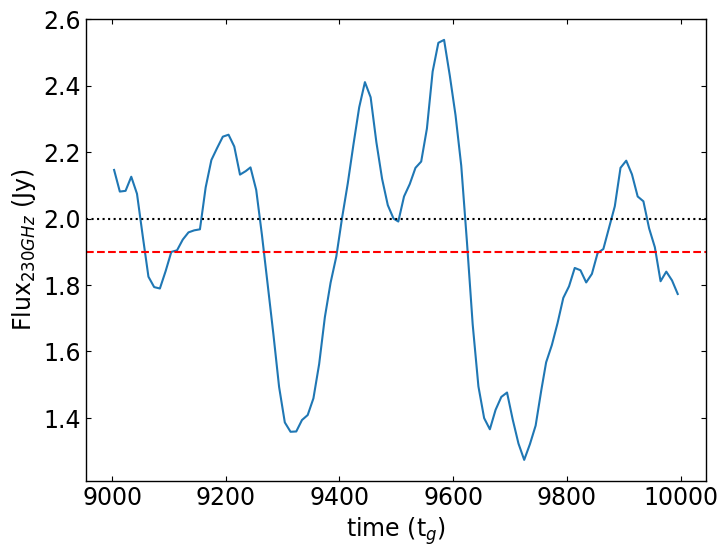

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.146402 Jy at 9003.597816
312:: 2.081287 Jy at 9013.664967
313:: 2.083452 Jy at 9023.730951
314:: 2.125947 Jy at 9033.794470
315:: 2.074629 Jy at 9043.862656
316:: 1.947870 Jy at 9053.929463
317:: 1.824968 Jy at 9063.995875
318:: 1.793670 Jy at 9074.060236
319:: 1.789420 Jy at 9084.125014
320:: 1.841515 Jy at 9094.191161
321:: 1.899634 Jy at 9104.258463
322:: 1.904401 Jy at 9114.324296
323:: 1.936728 Jy at 9124.388087
324:: 1.958440 Jy at 9134.450798
325:: 1.964526 Jy at 9144.515488
326:: 1.967645 Jy at 9154.580838
327:: 2.093773 Jy at 9164.643343
328:: 2.176267 Jy at 9174.708090
329:: 2.212314 Jy at 9184.774596
330:: 2.246570 Jy at 9194.841238
331:: 2.252481 Jy at 9204.906551
332:: 2.217001 Jy at 9214.968879
333:: 2.132329 Jy at 9225.032659
334:: 2.142823 Jy at 9235.096933
335:: 2.154081 Jy at 9243.486122
336:: 2.086158 Jy at 9253.551623
337:: 1.950887 Jy at 9263.615142
338:: 1.801917 Jy at 9273.678488
339:: 1.652370 Jy at 9283.741347
340:: 1.493126 Jy at 9293.805262
341:: 1.38

In [2]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 70, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc70/BHOSS_CODE
311, flux: 2.037523 at 9003.597816
312, flux: 2.000441 at 9013.664967
313, flux: 2.009979 at 9023.730951
314, flux: 2.077528 at 9033.794470
315, flux: 1.992695 at 9043.862656
316, flux: 1.859188 at 9053.929463
317, flux: 1.754629 at 9063.995875
318, flux: 1.737116 at 9074.060236
319, flux: 1.760827 at 9084.125014
320, flux: 1.851321 at 9094.191161
321, flux: 1.951620 at 9104.258463
322, flux: 1.959615 at 9114.324296
323, flux: 2.006830 at 9124.388087
324, flux: 2.090678 at 9134.450798
325, flux: 2.118930 at 9144.515488
326, flux: 2.043237 at 9154.580838
327, flux: 2.151622 at 9164.643343
328, flux: 2.180871 at 9174.708090
329, flux: 2.245297 at 9184.774596
330, flux: 2.314574 at 9194.841238
331, flux: 2.282391 at 9204.906551
332, flux: 2.225016 at 9214.968879
333, flux: 2.151406 at 9225.032659
334, flux: 2.194475 at 9235.096933
335, flux: 2.196781 at 9243.486122
336, flux: 2.093128 at 9253.551623
337,

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.914301 Jy, the density scale = 2.930000e-18


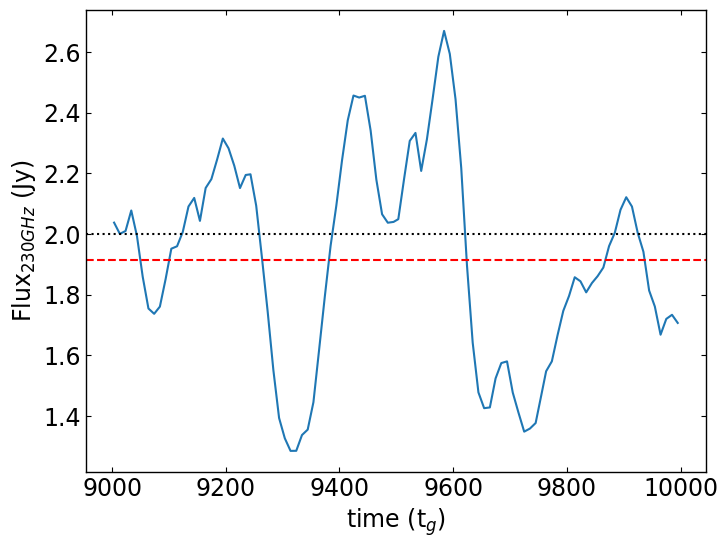

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.037523 Jy at 9003.597816
312:: 2.000441 Jy at 9013.664967
313:: 2.009979 Jy at 9023.730951
314:: 2.077528 Jy at 9033.794470
315:: 1.992695 Jy at 9043.862656
316:: 1.859188 Jy at 9053.929463
317:: 1.754629 Jy at 9063.995875
318:: 1.737116 Jy at 9074.060236
319:: 1.760827 Jy at 9084.125014
320:: 1.851321 Jy at 9094.191161
321:: 1.951620 Jy at 9104.258463
322:: 1.959615 Jy at 9114.324296
323:: 2.006830 Jy at 9124.388087
324:: 2.090678 Jy at 9134.450798
325:: 2.118930 Jy at 9144.515488
326:: 2.043237 Jy at 9154.580838
327:: 2.151622 Jy at 9164.643343
328:: 2.180871 Jy at 9174.708090
329:: 2.245297 Jy at 9184.774596
330:: 2.314574 Jy at 9194.841238
331:: 2.282391 Jy at 9204.906551
332:: 2.225016 Jy at 9214.968879
333:: 2.151406 Jy at 9225.032659
334:: 2.194475 Jy at 9235.096933
335:: 2.196781 Jy at 9243.486122
336:: 2.093128 Jy at 9253.551623
337:: 1.922803 Jy at 9263.615142
338:: 1.745057 Jy at 9273.678488
339:: 1.551611 Jy at 9283.741347
340:: 1.393739 Jy at 9293.805262
341:: 1.32

In [4]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 90, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc90/BHOSS_CODE
311, flux: 2.086266 at 9003.597816
312, flux: 2.041050 at 9013.664967
313, flux: 2.107604 at 9023.730951
314, flux: 2.142750 at 9033.794470
315, flux: 2.065580 at 9043.862656
316, flux: 1.877594 at 9053.929463
317, flux: 1.775492 at 9063.995875
318, flux: 1.753895 at 9074.060236
319, flux: 1.801043 at 9084.125014
320, flux: 1.906852 at 9094.191161
321, flux: 2.043668 at 9104.258463
322, flux: 2.049583 at 9114.324296
323, flux: 2.096837 at 9124.388087
324, flux: 2.211800 at 9134.450798
325, flux: 2.377632 at 9144.515488
326, flux: 2.346060 at 9154.580838
327, flux: 2.284587 at 9164.643343
328, flux: 2.339454 at 9174.708090
329, flux: 2.321693 at 9184.774596
330, flux: 2.410432 at 9194.841238
331, flux: 2.460856 at 9204.906551
332, flux: 2.394990 at 9214.968879
333, flux: 2.291258 at 9225.032659
334, flux: 2.322994 at 9235.096933
335, flux: 2.323167 at 9243.486122
336, flux: 2.316867 at 9253.551623
337,

In [5]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [6]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.022347 Jy, the density scale = 2.980000e-18


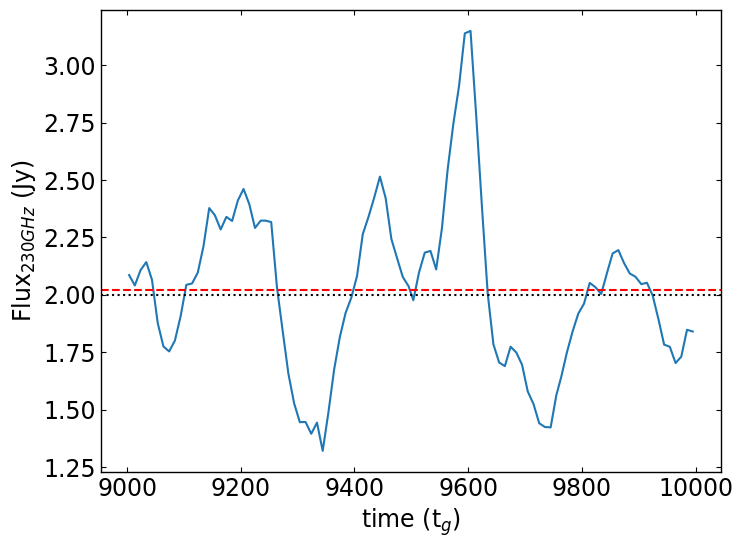

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [8]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.086266 Jy at 9003.597816
312:: 2.041050 Jy at 9013.664967
313:: 2.107604 Jy at 9023.730951
314:: 2.142750 Jy at 9033.794470
315:: 2.065580 Jy at 9043.862656
316:: 1.877594 Jy at 9053.929463
317:: 1.775492 Jy at 9063.995875
318:: 1.753895 Jy at 9074.060236
319:: 1.801043 Jy at 9084.125014
320:: 1.906852 Jy at 9094.191161
321:: 2.043668 Jy at 9104.258463
322:: 2.049583 Jy at 9114.324296
323:: 2.096837 Jy at 9124.388087
324:: 2.211800 Jy at 9134.450798
325:: 2.377632 Jy at 9144.515488
326:: 2.346060 Jy at 9154.580838
327:: 2.284587 Jy at 9164.643343
328:: 2.339454 Jy at 9174.708090
329:: 2.321693 Jy at 9184.774596
330:: 2.410432 Jy at 9194.841238
331:: 2.460856 Jy at 9204.906551
332:: 2.394990 Jy at 9214.968879
333:: 2.291258 Jy at 9225.032659
334:: 2.322994 Jy at 9235.096933
335:: 2.323167 Jy at 9243.486122
336:: 2.316867 Jy at 9253.551623
337:: 2.034324 Jy at 9263.615142
338:: 1.843967 Jy at 9273.678488
339:: 1.657565 Jy at 9283.741347
340:: 1.529024 Jy at 9293.805262
341:: 1.44